In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
import sweetviz as sv
from pandas_profiling import ProfileReport

In [23]:
mp = pd.read_csv('~/Desktop/To_prediction/Metaphlan4_all_pheno.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp

In [ ]:
for column in mp.columns:
    # print(column)
    sns.scatterplot(data=mp[column])
    plt.show()

In [3]:
select_sampels = pd.read_csv('~/Desktop/selected_samples_MGX.csv')
select_sampels = select_sampels.set_index('External ID')
select_sampels.drop("Participant ID", inplace=True, axis=1)

In [4]:
mp = mp.loc[select_sampels.index,:]
mp = mp.loc[:,mp.columns.str.startswith('s__')]
mp["diagnosis"] = select_sampels.iloc[:,-1]
mp

,s__Phocaeicola_vulgatus,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,...,s__GGB3632_SGB4921,s__GGB4710_SGB6522,s__GGB4706_SGB6513,s__GGB3643_SGB4948,s__Sanguibacteroides_SGB1777,s__GGB3632_SGB4920,s__Lachnospiraceae_bacterium_NSJ_46,s__Prevotella_sp_DNF00663,s__Collinsella_SGB14747,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,36.02530,1.45700,1.91898,1.34449,0.03810,0.90627,19.83516,0.28439,17.15467,0.03724,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
CSM5MCVN,51.31297,0.95498,1.54371,0.04588,0.18414,1.99150,7.95270,0.01466,18.67487,0.34879,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
CSM67UBZ,0.00313,1.29919,1.03434,2.82078,0.00694,10.84042,1.39625,0.00558,16.65207,1.02143,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
CSM5MCXL,32.29455,3.46622,2.09791,9.10884,0.71850,2.63304,0.00904,0.55343,12.83634,0.12034,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
CSM5MCY8,40.22876,0.56787,0.15291,0.04742,0.30914,2.20589,0.01291,0.15447,8.33000,0.22200,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19N,5.47393,1.38623,1.06951,0.02240,0.60937,4.65083,2.58785,0.71590,4.14365,0.16762,...,0.05911,0.18696,0.23143,0.01579,0.00464,0.04352,0.01596,0.02668,0.01905,nonIBD
PSM6XBW3,10.50664,0.27922,0.37723,0.32395,0.08358,3.69814,0.32749,0.19103,1.19686,0.13442,...,0.05911,0.18696,0.23143,0.01579,0.00464,0.04352,0.01596,0.02668,0.01905,nonIBD
PSM7J12J,0.00515,1.51739,2.24522,1.38714,0.20735,4.37121,1.14150,0.01921,7.01159,0.22608,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,CD


In [14]:
MTX_X = mp.iloc[:,1:1096]
MTX_y = select_sampels.iloc[:,-1]

#fill NA's
MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.30, random_state=0)
# y = label_binarize(y_train, classes=[0, 1, 2])
# n_classes = y.shape[1]

Best Model:
RandomForestClassifier(max_features=2, min_samples_split=5, random_state=0)


<AxesSubplot:>

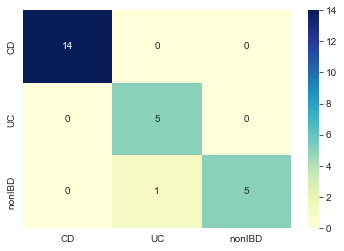

In [22]:
n_estimators_RF = [5, 10, 25, 50, 100]
max_features_RF = [2,4,8,16,32,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=5, random_state=0)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring= 'accuracy') #completeness_score')

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

In [19]:
from sklearn import metrics
print(f'Accuracy {round(metrics.accuracy_score(y_test, RF_predictions)*100,2)}%')

Accuracy 96.0%
